In [74]:
import numpy as np
import pandas as pd
import plotnine as p9

In [75]:
# Rename functions
name_dict = {'cosine': 'Cosine similarity',
             'jaccard': 'Jaccard index',
             'masked_spearman': 'Masked Spearman',
             'pearson': 'Pearson correlation',
             'morans': 'Moran\'s R',
             'spearman': 'Spearman correlation',
             'product': 'Product',
             'norm_product': 'Normalized product',
             }

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_regress_perf(results, metric_name, ax=None, show_x_labels=True, show_legend=False, 
                      title_fontsize=16, label_fontsize=14, tick_labelsize=12):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x='patient_group', y=metric_name, hue='function_name', data=results, palette='Dark2', ax=ax)
    
    # Ensure that the dodge parameter is set to True and the hue order matches the boxplot
    sns.stripplot(x='patient_group', y=metric_name, hue='function_name', data=results, 
                  color='black', size=6, ax=ax, dodge=True)
    
    ax.set_title('', fontsize=title_fontsize)
    ax.set_xlabel('Condition' if show_x_labels else '', fontsize=label_fontsize)
    ax.set_ylabel(str.upper(metric_name), fontsize=label_fontsize)
    
    if show_legend:
        ax.legend(title='Metric', fontsize=label_fontsize)
    else:
        ax.legend([],[], frameon=False)
    
    if not show_x_labels:
        ax.set_xticklabels([])
    else:
        ax.tick_params(axis='x', labelrotation=90, labelsize=tick_labelsize)
        ax.tick_params(axis='y', labelsize=tick_labelsize)
    
    # This is necessary to remove the extra legend created by stripplot due to the 'hue' parameter
    handles, labels = ax.get_legend_handles_labels()
    if show_legend:
        ax.legend(handles[:len(set(results['function_name']))], labels[:len(set(results['function_name']))], 
                  title='Metric', fontsize=label_fontsize)
    else:
        ax.legend([],[], frameon=False)
    
    return ax


def plot_annot_perf(performance, y, metric_name, ax=None, show_legend=False, show_x_labels=False,
                    title_fontsize=16, label_fontsize=14, tick_labelsize=12, legend_fontsize=12):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x='function_name', y=y, data=performance, palette='Dark2', ax=ax)
    sns.stripplot(x='function_name', y=y, data=performance, color='black', size=4, dodge=True, ax=ax)
    
    ax.set_title('', fontsize=title_fontsize)
    ax.set_xlabel('', fontsize=label_fontsize)
    ax.set_ylabel(metric_name, fontsize=label_fontsize)
    ax.tick_params(axis='x', labelrotation=90, labelsize=tick_labelsize)
    ax.tick_params(axis='y', labelsize=tick_labelsize)
    ax.set_ylim(0.5, 1)

        
    if not show_x_labels:
        ax.set_xticklabels([])
    else:
        ax.tick_params(axis='x', labelrotation=90, labelsize=tick_labelsize)
        ax.tick_params(axis='y', labelsize=tick_labelsize)

    if show_legend:
        ax.legend(title='Metric', fontsize=legend_fontsize)
    else:
        ax.legend([], [], frameon=False)

    return ax


## Regression Results

In [23]:
regress = pd.read_csv("regression_results.csv")
metadata = pd.read_csv("visium_meta.csv")

In [24]:
# mean r2 and rmse, aggregate folds
regress = regress.groupby(['dataset_name', 'function_name']).mean().reset_index()

In [25]:
regress = regress.merge(metadata, left_on='dataset_name', right_on='slide_name', how='left')

In [26]:
# how many datasets per major_labl
regress.groupby('patient_group').count() / 6

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,major_labl,batch,hca_sample_id
patient_group,,,,,,,,,,
group_1,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667
group_2,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
group_3,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667


In [27]:
## patient_group, group_1 to myogenic, 2 to ischemic, 3 to fibrotic
regress['patient_group'] = regress['patient_group'].replace({'group_1': 'Myogenic\n(n=14)', 'group_2': 'Ischemic\n(n=9)', 'group_3': 'Fibrotic\n(n=5)'})

In [28]:
regress['function_name'].replace(name_dict, inplace=True)

## Annotation results

In [38]:
anno = pd.read_csv("annotation_results.csv")

In [39]:
anno

,dataset_name,Unnamed: 1,dataset_name.1,function_name,roc_auc,f1,oob_score
0,1160920F,0,1160920F,pearson,0.979181,0.896661,0.904794
1,1160920F,1,1160920F,spearman,0.976797,0.899080,0.905476
2,1160920F,2,1160920F,cosine,0.979154,0.925410,0.923426
3,1160920F,3,1160920F,jaccard,0.979581,0.916984,0.925926
4,1160920F,4,1160920F,product,0.983640,0.940332,0.927516
...,...,...,...,...,...,...,...
315,1142243F,75,1142243F,jaccard,0.855242,0.714327,0.787249
316,1142243F,76,1142243F,product,0.837597,0.712892,0.788650
317,1142243F,77,1142243F,norm_product,0.837307,0.712892,0.789818
318,1142243F,78,1142243F,morans,0.709601,0.677626,0.772303


In [40]:
anno = anno.groupby(['dataset_name', 'function_name']).mean().reset_index()
# rank by dataset_name
anno['rank'] = anno.groupby('dataset_name')['roc_auc'].rank(ascending=False).astype('int')

anno['function_name'].replace(name_dict, inplace=True)
plot = plot_annot_perf(anno, y='roc_auc', metric_name='AUROC')
plot = plot_annot_perf(anno, y='f1', metric_name='F1')

/tmp/ipykernel_676723/1556610793.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


## Concat plots and Save

In [179]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

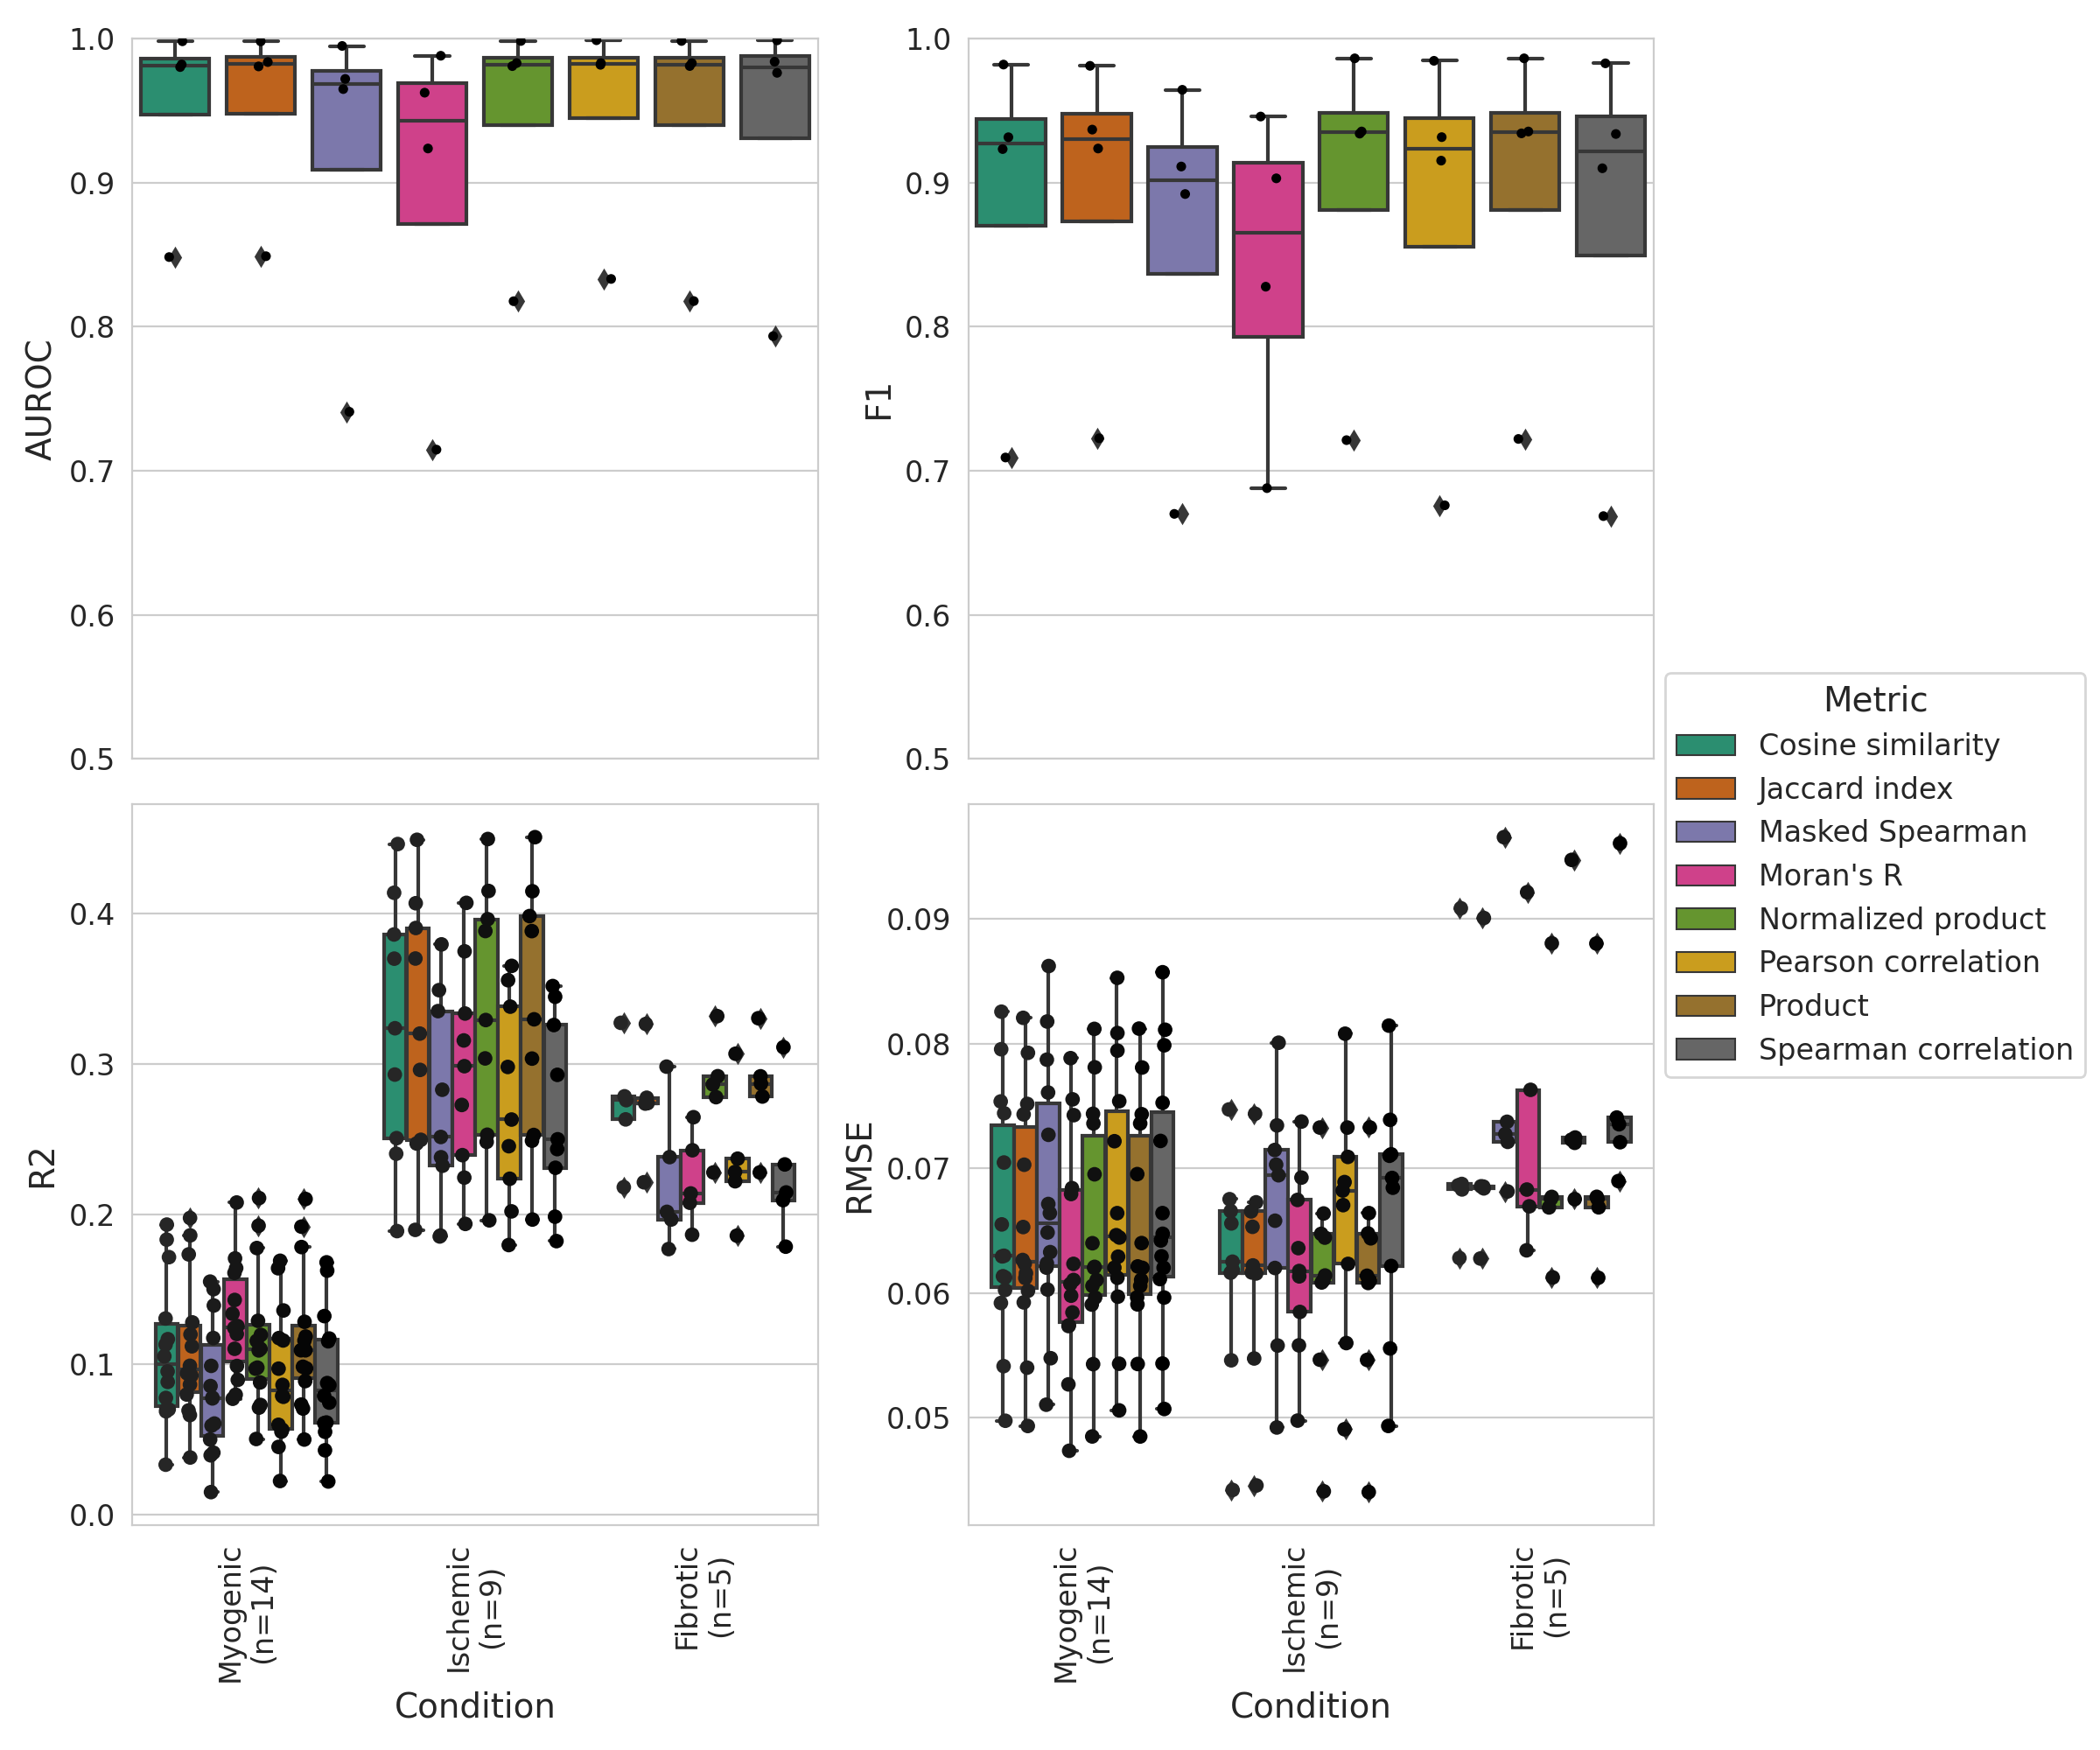

In [189]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_annot_perf(anno, 'roc_auc', metric_name="AUROC", ax=axes[0, 0], show_x_labels=False)
plot_annot_perf(anno, 'f1', metric_name='F1', ax=axes[0, 1], show_x_labels=False)
plot_regress_perf(regress, 'r2', ax=axes[1, 0], show_x_labels=True)
plot_regress_perf(regress, 'rmse', ax=axes[1, 1], show_x_labels=True)

# Rotate the x-axis labels for the bottom left plot
for label in axes[1, 0].get_xticklabels():
    label.set_rotation(90)

# Move the legend to the right side of the figure
handles, labels = axes[1, 1].get_legend_handles_labels()
handles = [h for h in handles if isinstance(h, mpatches.Rectangle)]
# keep only labels for the number of handl
labels = labels[:len(handles)]
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1, 0.5), title='Metric', fontsize=12, title_fontsize=14)

plt.tight_layout(rect=[0, 0, 0.80, 1])  # Adjust the rect to prevent cutting off the x-axis labels and make space for the legend
plt.show()
